# Programming and Scripting-Project

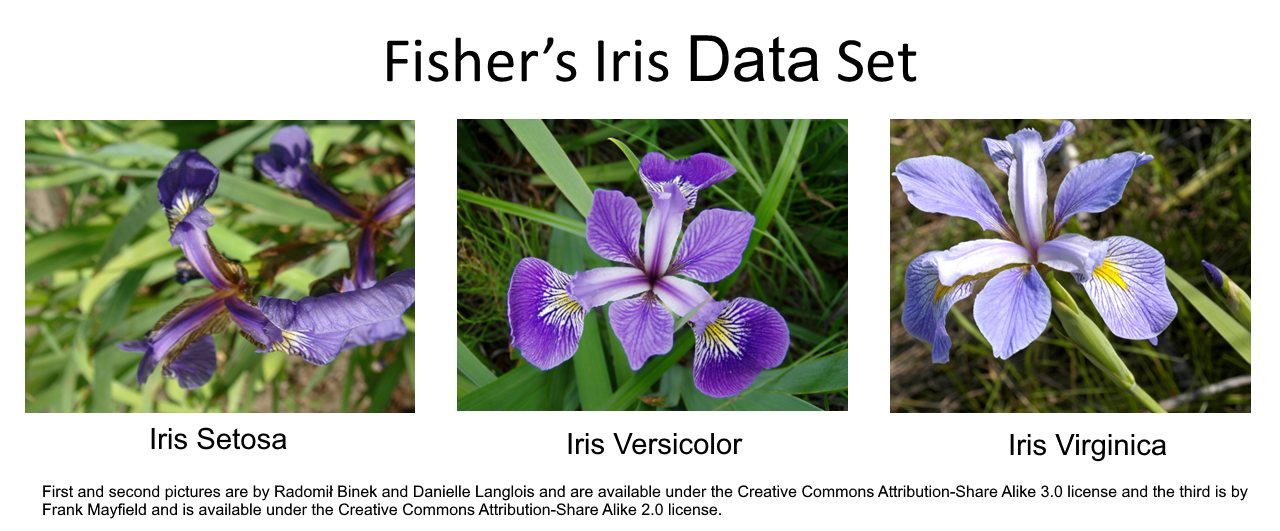

## Introduction

Fisher’s Iris Data Set is based on data collected by Edgar Anderson from three species of irises in the Gaspé Peninsula in Quebec, Canada. This Data set has been used countless times in statistics papers since they were first used by R. A. Fisher in 1936 to introduce the method of discriminant analysis. The dataset is made up of five variables, the first four of which are measurements of Sepal Length, Sepal Width, Petal Length and Petal Width, and a fifth variable which denotes which species of iris, Iris Setosa,Iris Versicolour, and Iris Virginca(Fox and Weisberg, 2011). There are 50 samples for each species for a total of 150 samples. Fishers aim was to classify the species based on the different measurements in the dataset and since the advent of machine learning this dataset has become a benchmark for testing algorithms.

In most flowering plants sepals are usually the green leaf like structures that enclose the flower in the bud and open up to support the petals when it blooms. While Botanists disagree as to whether Irises have Sepals or not(‘What-should-we-know-about-the-famous-Iris-data.pdf’, 2013), for the purposes of this project, we will, as Anderson and Fisher have done, count the larger petal-like parts of the flower as sepals.

<p align="center">
<img src="Sepal-Petal.png" width="320" height="235">
</p>


In this project I will demonstrate various methods for capturing the data set, how to compare data sets, various ways of plotting the dataset and finally I will attempt to code a solution that  classifies the samples.

### Capturing and saving the dataset

The code below shows 3 ways of getting the code 
1. Import from a manually downloaded and saved locally CSV file.
2. Download using an API from https://scikit-learn.org/
3. Scrapping from the Iris Dataset wikipedia page at https://en.wikipedia.org/wiki/Iris_flower_data_set
These 3 datasets will be then saved to an Excel file.

It also shows modifications to the Pandas dataframes to align column names, species names and the number of columns

In [2]:
# load_iris_data.py
# Author: Declan Fox
# Test writing all 3 datasets to 1 xl file


import csv
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# import from CSV file
FILENAME="iris_data.csv"
with open(FILENAME, "rt") as file:
    csvReader = csv.reader(file, delimiter = ',') 

# load to Pandas Dataframe
df1 = pd.read_csv('iris_data.csv', header=None)
# add column names
df1.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Species' ]


# Download from API
iris = load_iris()
df2= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])
# Rename target column to species
df2.rename(columns={'target': 'Species'}, inplace=True)
# replace numbers with species' names
df2['Species'].replace({ 0 : 'Iris-setosa', 1 : 'Iris-versicolor', 2 : 'Iris-virginica'}, inplace=True)


# Scrape from website
py_url = "https://en.wikipedia.org/wiki/Iris_flower_data_set"
py_page = requests.get (py_url)
py_soup = bs(py_page.text, 'html.parser')
py_table = py_soup.find ('table', {'class':'wikitable'})
py_rows = py_table.find_all ('tr')

df3=pd.read_html(str(py_table))
# convert list to dataframe
df3=pd.DataFrame(df3[0])
# Rename columns
df3.rename(columns={'Sepal length': 'sepal length (cm)', 'Sepal width': 'sepal width (cm)'}, inplace=True)
df3.rename(columns={'Petal length': 'petal length (cm)', 'Petal width': 'petal width (cm)'}, inplace=True)
# update species' names to match the other dataframes
df3['Species'].replace({ 'I. setosa' : 'Iris-setosa', 'I. versicolor' : 'Iris-versicolor', 'I. virginica' : 'Iris-virginica'}, inplace=True)
# Delete Dataset order column
df3 = df3.drop('Dataset order', axis=1)

# write to Excel
with pd.ExcelWriter('iris_dataset.xlsx', engine='openpyxl') as writer: 
    df1.to_excel(writer, sheet_name='CSV',index=False)
    df2.to_excel(writer, sheet_name='API',index=False)
    df3.to_excel(writer, sheet_name='Wiki',index=False)

SSLError: HTTPSConnectionPool(host='en.wikipedia.org', port=443): Max retries exceeded with url: /wiki/Iris_flower_data_set (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)')))

Here is a screenshot of the excel workbook created by this code.

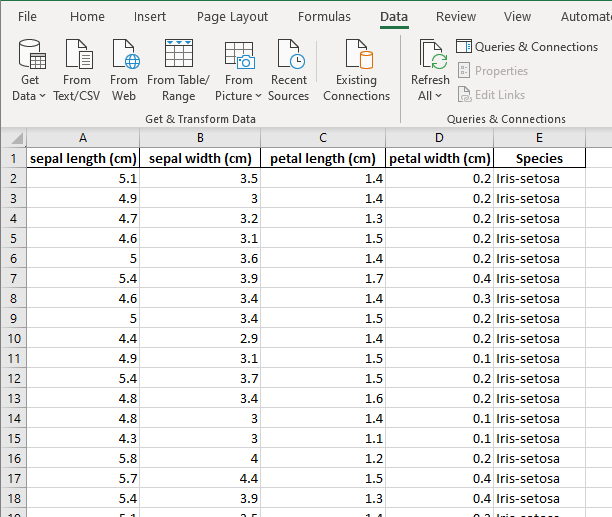

### Compare

This code compares the 3 dataframes

In [ ]:
print('CSV vs API\n', df1.compare(df2))
print('\nCSV vs WIKI\n', df1.compare(df3))
print('\nAPI vs WIKI\n', df2.compare(df3))

I would have expected Wikipedia to have a mistake or two, but I would have expected the UCI version and the SK-learn API version to match as both are used for teaching Data Analytics and Machine Learning. I looked up fishers original paper[1] and the API version is the correct one. I will use this version for all work going forward.
[1]Fisher, R.A., 1936. The use of multiple measurements in taxonomic problems. Annals of eugenics, 7(2), pp.179-188.


### Generate a text file

The following code will create a text file with some information on each variable:

In [4]:
df = df2
#split out species
df1 = df[0:50]
df2 = df[50:100]
df3 = df[100:150]

def mean(data_frame, col):
    mean = data_frame[col].mean()
    return mean

def min(data_frame, col):
    min = data_frame[col].min()
    return min

def max(data_frame, col):
    max = data_frame[col].max()
    return max




FILENAME = "variables.txt"

Sepal_length = (f'''Sepal Length:\n
The maximum Sepal length is {max(df, 'sepal length (cm)')}, the minimum is {min(df, 'sepal length (cm)')} and the mean is {round(mean(df, 'sepal length (cm)'),3)}\n
For Setosa the maximum Sepal length is {max(df1, 'sepal length (cm)')}, the minimum is {min(df1, 'sepal length (cm)')} and the mean is {round(mean(df1, 'sepal length (cm)'),3)}
For Versicolor the maximum Sepal length is {max(df2, 'sepal length (cm)')}, the minimum is {min(df2, 'sepal length (cm)')} and the mean is {round(mean(df2, 'sepal length (cm)'),3)}
For Virginica the maximum Sepal length is {max(df3, 'sepal length (cm)')}, the minimum is {min(df3, 'sepal length (cm)')} and the mean is {round(mean(df3, 'sepal length (cm)'),3)}
''')
Sepal_width = (f'''\nSepal Width:\n
The maximum Sepal Width is {max(df, 'sepal width (cm)')}, the minimum is {min(df, 'sepal width (cm)')} and the mean is {round(mean(df, 'sepal width (cm)'),3)}\n
For Setosa the maximum Sepal Width is {max(df1, 'sepal width (cm)')}, the minimum is {min(df1, 'sepal width (cm)')} and the mean is {round(mean(df1, 'sepal width (cm)'),3)}
For Versicolor the maximum Sepal Width is {max(df2, 'sepal width (cm)')}, the minimum is {min(df2, 'sepal width (cm)')} and the mean is {round(mean(df2, 'sepal width (cm)'),3)}
For Virginica the maximum Sepal Width is {max(df3, 'sepal width (cm)')}, the minimum is {min(df3, 'sepal width (cm)')} and the mean is {round(mean(df3, 'sepal width (cm)'),3)}
''')

Petal_length = (f'''\nPetal Length:
The maximum Petal length is {max(df, 'petal length (cm)')}, the minimum is {min(df, 'petal length (cm)')} and the mean is {round(mean(df, 'petal length (cm)'),3)}\n
For Setosa the maximum Petal length is {max(df1, 'petal length (cm)')}, the minimum is {min(df1, 'petal length (cm)')} and the mean is {round(mean(df1, 'petal length (cm)'),3)}
For Versicolor the maximum Petal length is {max(df2, 'petal length (cm)')}, the minimum is {min(df2, 'petal length (cm)')} and the mean is {round(mean(df2, 'petal length (cm)'),3)} 
For Virginica the maximum Petal length is {max(df3, 'petal length (cm)')}, the minimum is {min(df3, 'petal length (cm)')} and the mean is {round(mean(df3, 'petal length (cm)'),3)}
''')
Petal_width	= (f'''\nPetal Width:
The maximum Petal Width is {max(df, 'petal width (cm)')}, the minimum is {min(df, 'petal width (cm)')} and the mean is {round(mean(df, 'petal width (cm)'),3)}\n
For Setosa the maximum Petal Width is {max(df1, 'petal width (cm)')}, the minimum is {min(df1, 'petal width (cm)')} and the mean is {round(mean(df1, 'petal width (cm)'),3)}
For Versicolor the maximum Petal Width is {max(df2, 'petal width (cm)')}, the minimum is {min(df2, 'petal width (cm)')} and the mean is {round(mean(df2, 'petal width (cm)'),3)}
For Virginica the maximum Petal Width is {max(df3, 'petal width (cm)')}, the minimum is {min(df3, 'petal width (cm)')} and the mean is {round(mean(df3, 'petal width (cm)'),3)}
''')

with open(FILENAME, 'wt') as f:
    f.write(Sepal_length)
    f.write(Sepal_width)
    f.write(Petal_length)
    f.write(Petal_width)


We can read at the outputed file with the following code

In [5]:
with open("variables.txt") as file:
    
    lines=file.readlines()
    for line in lines:
        print(line, end = '')
        

Sepal Length:

The maximum Sepal length is 7.9, the minimum is 4.3 and the mean is 5.843

For Setosa the maximum Sepal length is 5.8, the minimum is 4.3 and the mean is 5.006
For Versicolor the maximum Sepal length is 7.0, the minimum is 4.9 and the mean is 5.936
For Virginica the maximum Sepal length is 7.9, the minimum is 4.9 and the mean is 6.588

Sepal Width:

The maximum Sepal Width is 4.4, the minimum is 2.0 and the mean is 3.057

For Setosa the maximum Sepal Width is 4.4, the minimum is 2.3 and the mean is 3.428
For Versicolor the maximum Sepal Width is 3.4, the minimum is 2.0 and the mean is 2.77
For Virginica the maximum Sepal Width is 3.8, the minimum is 2.2 and the mean is 2.974

Petal Length:
The maximum Petal length is 6.9, the minimum is 1.0 and the mean is 3.758

For Setosa the maximum Petal length is 1.9, the minimum is 1.0 and the mean is 1.462
For Versicolor the maximum Petal length is 5.1, the minimum is 3.0 and the mean is 4.26 
For Virginica the maximum Petal lengt

### Plotting 

The following code will generate histograms of each variable:

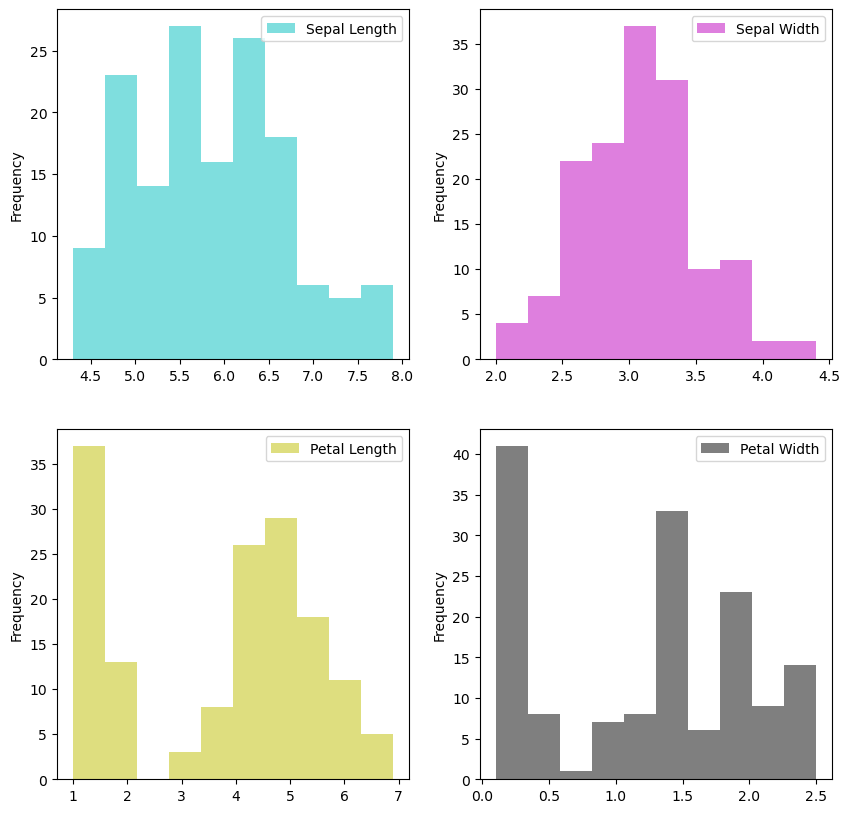

In [6]:
fig, ((ax, ax1), (ax2, ax3)) = plt.subplots(ncols=2, nrows=2,  figsize=(10, 10))

df.plot(kind = 'hist', y = 'sepal length (cm)', color='c', alpha = 0.5, label = 'Sepal Length', ax=ax)
df.plot(kind = 'hist', y = 'sepal width (cm)', color='m', alpha = 0.5, label = 'Sepal Width', ax=ax1)
df.plot(kind = 'hist', y = 'petal length (cm)', color='y', alpha = 0.5, label = 'Petal Length', ax=ax2)
df.plot(kind = 'hist', y = 'petal width (cm)', color='k', alpha = 0.5, label = 'Petal Width', ax=ax3)

plt.show()


Histograms of each variable by species

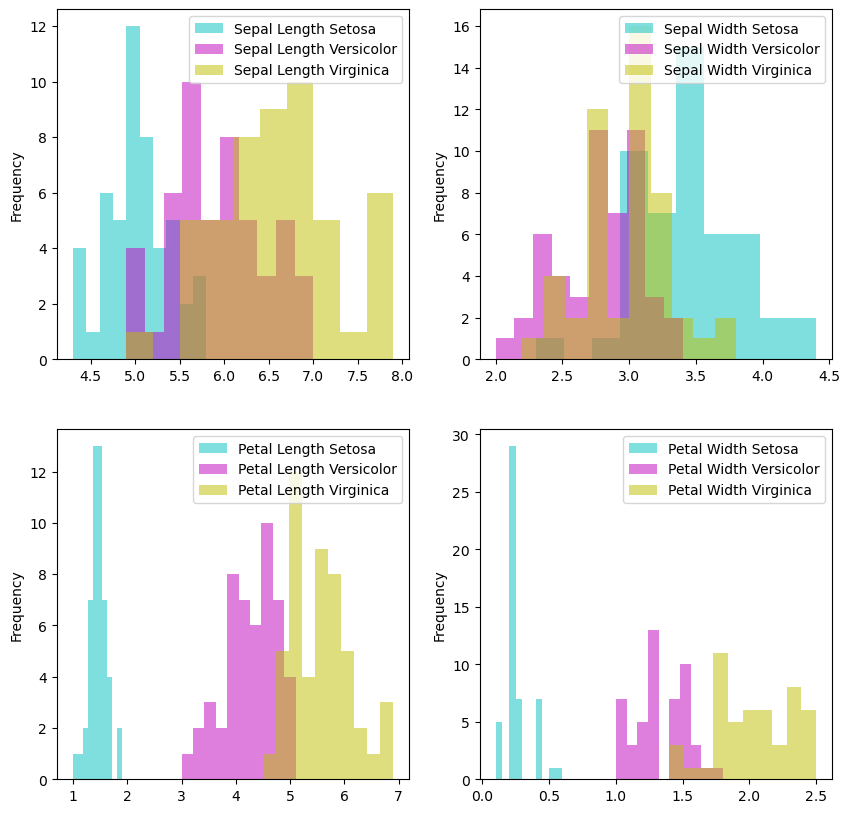

In [7]:
#split out species    
    
df1 = df[0:50]
df2 = df[50:100]
df3 = df[100:150]

# plot histograms species

fig, ((ax, ax1), (ax2, ax3)) = plt.subplots(ncols=2, nrows=2,  figsize=(10, 10))

df1.plot(kind = 'hist', y = 'sepal length (cm)', color='c', alpha = 0.5, label = 'Sepal Length Setosa', ax=ax)
df2.plot(kind = 'hist', y = 'sepal length (cm)', color='m', alpha = 0.5, label = 'Sepal Length Versicolor', ax=ax)
df3.plot(kind = 'hist', y = 'sepal length (cm)', color='y', alpha = 0.5, label = 'Sepal Length Virginica', ax=ax)
df1.plot(kind = 'hist', y = 'sepal width (cm)', color='c', alpha = 0.5, label = 'Sepal Width Setosa', ax=ax1)
df2.plot(kind = 'hist', y = 'sepal width (cm)', color='m', alpha = 0.5, label = 'Sepal Width Versicolor', ax=ax1)
df3.plot(kind = 'hist', y = 'sepal width (cm)', color='y', alpha = 0.5, label = 'Sepal Width Virginica', ax=ax1)
df1.plot(kind = 'hist', y = 'petal length (cm)', color='c', alpha = 0.5, label = 'Petal Length Setosa', ax=ax2)
df2.plot(kind = 'hist', y = 'petal length (cm)', color='m', alpha = 0.5, label = 'Petal Length Versicolor', ax=ax2)
df3.plot(kind = 'hist', y = 'petal length (cm)', color='y', alpha = 0.5, label = 'Petal Length Virginica', ax=ax2)
df1.plot(kind = 'hist', y = 'petal width (cm)', color='c', alpha = 0.5, label = 'Petal Width Setosa', ax=ax3)
df2.plot(kind = 'hist', y = 'petal width (cm)', color='m', alpha = 0.5, label = 'Petal Width Versicolor', ax=ax3)
df3.plot(kind = 'hist', y = 'petal width (cm)', color='y', alpha = 0.5, label = 'Petal Width Virginica', ax=ax3)

plt.show()


Scatter plots of all pairs of variables.

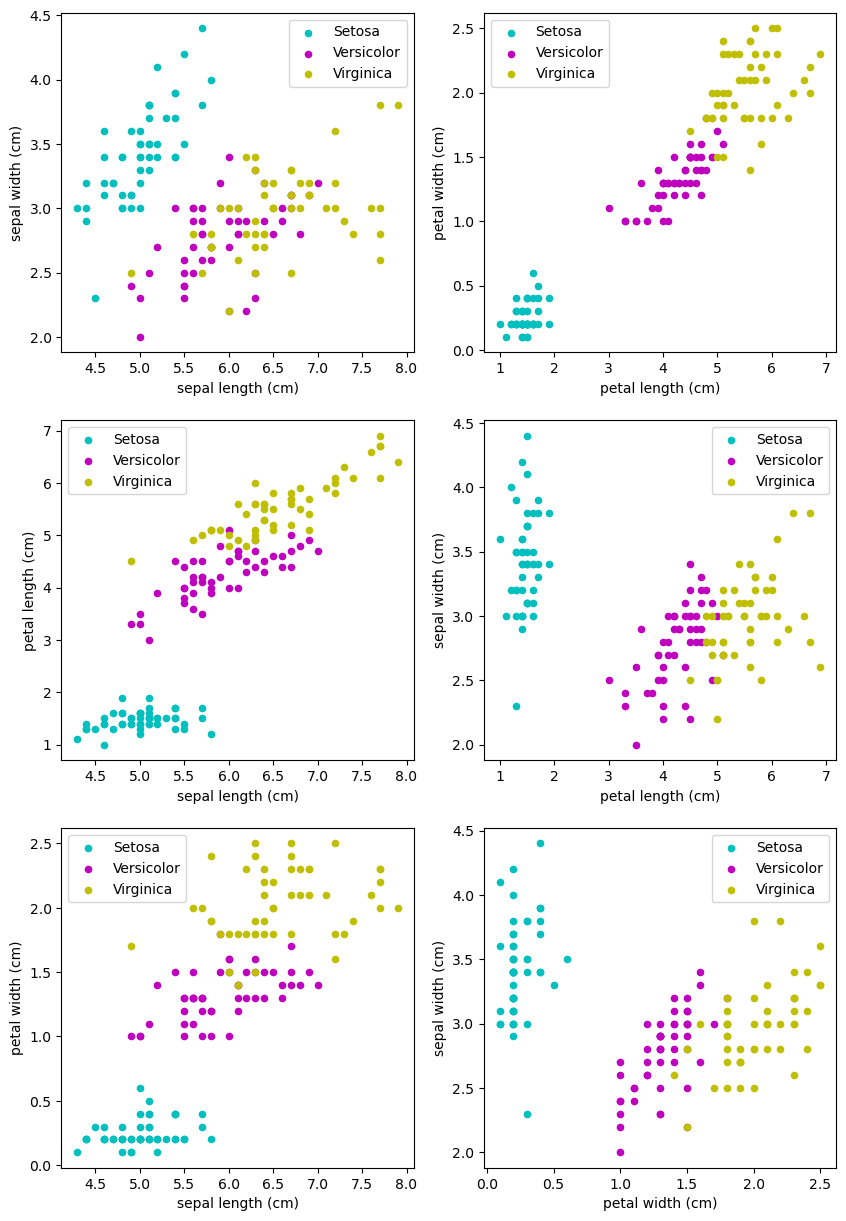

In [8]:
fig, ((ax, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(ncols=2, nrows=3, figsize=(10, 15))

df1.plot(kind = 'scatter', x = 'sepal length (cm)', y = 'sepal width (cm)', label = 'Setosa', color='c', ax=ax)
df2.plot(kind = 'scatter', x = 'sepal length (cm)', y = 'sepal width (cm)', color='m', label = 'Versicolor', ax=ax)
df3.plot(kind = 'scatter', x = 'sepal length (cm)', y = 'sepal width (cm)', color='y', label = 'Virginica', ax=ax)

df1.plot(kind = 'scatter', x = 'petal length (cm)', y = 'petal width (cm)', label = 'Setosa', color='c', ax=ax1)
df2.plot(kind = 'scatter', x = 'petal length (cm)', y = 'petal width (cm)', color='m', label = 'Versicolor', ax=ax1)
df3.plot(kind = 'scatter', x = 'petal length (cm)', y = 'petal width (cm)', color='y', label = 'Virginica', ax=ax1)

df1.plot(kind = 'scatter', x = 'sepal length (cm)', y = 'petal length (cm)', label = 'Setosa', color='c', ax=ax2)
df2.plot(kind = 'scatter', x = 'sepal length (cm)', y = 'petal length (cm)', color='m', label = 'Versicolor', ax=ax2)
df3.plot(kind = 'scatter', x = 'sepal length (cm)', y = 'petal length (cm)', color='y', label = 'Virginica', ax=ax2)

df1.plot(kind = 'scatter', x = 'petal length (cm)', y = 'sepal width (cm)', label = 'Setosa', color='c', ax=ax3)
df2.plot(kind = 'scatter', x = 'petal length (cm)', y = 'sepal width (cm)', color='m', label = 'Versicolor', ax=ax3)
df3.plot(kind = 'scatter', x = 'petal length (cm)', y = 'sepal width (cm)', color='y', label = 'Virginica', ax=ax3)

df1.plot(kind = 'scatter', x = 'sepal length (cm)', y = 'petal width (cm)', label = 'Setosa', color='c', ax=ax4)
df2.plot(kind = 'scatter', x = 'sepal length (cm)', y = 'petal width (cm)', color='m', label = 'Versicolor', ax=ax4)
df3.plot(kind = 'scatter', x = 'sepal length (cm)', y = 'petal width (cm)', color='y', label = 'Virginica', ax=ax4)

df1.plot(kind = 'scatter', x = 'petal width (cm)', y = 'sepal width (cm)', label = 'Setosa', color='c', ax=ax5)
df2.plot(kind = 'scatter', x = 'petal width (cm)', y = 'sepal width (cm)', color='m', label = 'Versicolor', ax=ax5)
df3.plot(kind = 'scatter', x = 'petal width (cm)', y = 'sepal width (cm)', color='y', label = 'Virginica', ax=ax5)

plt.show()

Heat Map

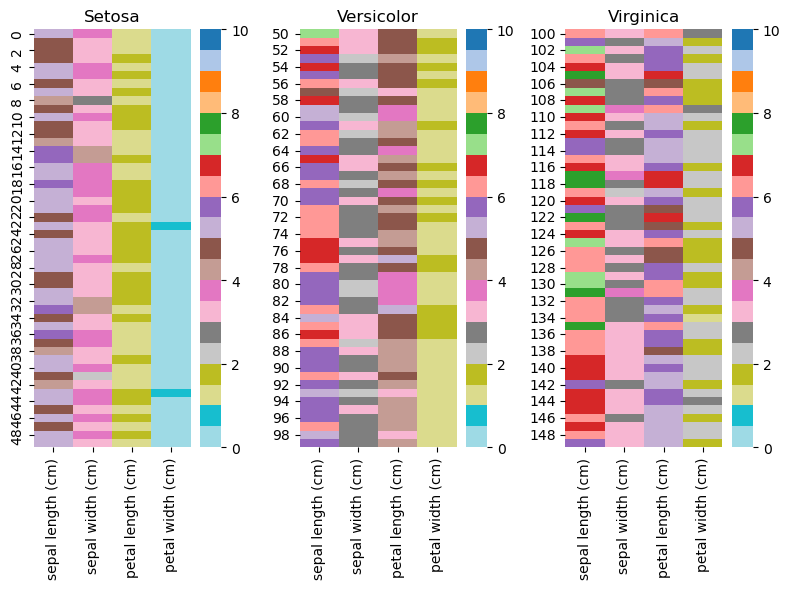

In [9]:
# Plot Heat Map

df1_data_cols = df1.drop('Species', axis=1)
df2_data_cols = df2.drop('Species', axis=1)
df3_data_cols = df3.drop('Species', axis=1)

fig, ((ax, ax1, ax2)) = plt.subplots(ncols=3, nrows=1,  figsize=(8, 6))

sns.heatmap(df1_data_cols, cmap ='tab20_r', vmin=0, vmax=10, ax=ax)
ax.set_title('Setosa')
plt.tight_layout()

sns.heatmap(df2_data_cols, cmap ='tab20_r', vmin=0, vmax=10, ax=ax1)
ax1.set_title('Versicolor')
plt.tight_layout()

sns.heatmap(df3_data_cols, cmap ='tab20_r', vmin=0, vmax=10, ax=ax2)
ax2.set_title('Virginica')
plt.tight_layout()

plt.show()


From this heat map we can see that Setosa can be easily seperated from the other species by petal width alone as the highest petal width for Setosa is less than 1cm and it’s greater for the other 2 species. We can also see that the petal width is greater than 1.5cm for all Virginica apart from the one at 134 on our plot. Looking at Versicolor we can see that petal length is less than 5cm for all except the 2 samples at 77 and 83 on our plot, however this information isn’t usefull when it comes to seperating the species.
Even if we could see a method for seperating the species that would be more or less useless for predicting what species a sample belongs to as we wouldn't have anything to test our method against, so out next job is to split our data into training and test data we will split it 70% to 30% training to test.



In [10]:
df_train = df.sample(frac = 0.70)
df_test = df.drop(df_train.index)


Next we seperate the training data by species.

In [11]:
# split training data by species
df_setosa = df_train[df_train['Species'] == 'Iris-setosa']
df_versicolor = df_train[df_train['Species'] == 'Iris-versicolor']
df_virginica = df_train[df_train['Species'] == 'Iris-virginica']

### Prediction

I have decided to see if I can code simple way of predicting  which species a particular sample belongs to. I will start by calculating the Means for each measurement for each species.

In [12]:
# Calculate Means
setosa_means = [mean(df_setosa, 'sepal length (cm)' ), mean(df_setosa, 'sepal width (cm)' ), 
                mean(df_setosa, 'petal length (cm)' ), mean(df_setosa, 'petal width (cm)' )]
versicolor_means = [mean(df_versicolor, 'sepal length (cm)' ), mean(df_versicolor, 'sepal width (cm)' ), 
                    mean(df_versicolor, 'petal length (cm)' ), mean(df_versicolor, 'petal width (cm)' )]
virginica_means = [mean(df_virginica, 'sepal length (cm)' ), mean(df_virginica, 'sepal width (cm)' ), 
                   mean(df_virginica, 'petal length (cm)' ), mean(df_virginica, 'petal width (cm)' )]


Next I will calculate the Standard Deviations for each datapoint.

In [13]:
# calculate standard deviations	

def std_dev(data_frame, col):
    std = data_frame[col].std()
    return std

setosa_stds = [std_dev(df_setosa, 'sepal length (cm)' ), std_dev(df_setosa, 'sepal width (cm)' ), 
                std_dev(df_setosa, 'petal length (cm)' ), std_dev(df_setosa, 'petal width (cm)' )]
versicolor_stds = [std_dev(df_versicolor, 'sepal length (cm)' ), std_dev(df_versicolor, 'sepal width (cm)' ), 
                    std_dev(df_versicolor, 'petal length (cm)' ), std_dev(df_versicolor, 'petal width (cm)' )]
virginica_stds = [std_dev(df_virginica, 'sepal length (cm)' ), std_dev(df_virginica, 'sepal width (cm)' ), 
                  std_dev(df_virginica, 'petal length (cm)' ),std_dev(df_virginica, 'petal width (cm)' )]


Same for the Medians.

In [14]:
# Calculate Medians

def median(data_frame, col):
    median = data_frame[col].median()
    return median

setosa_medians = [median(df_setosa, 'sepal length (cm)' ), median(df_setosa, 'sepal width (cm)' ), 
                median(df_setosa, 'petal length (cm)' ), median(df_setosa, 'petal width (cm)' )]
versicolor_medians = [median(df_versicolor, 'sepal length (cm)' ), median(df_versicolor, 'sepal width (cm)' ), 
                    median(df_versicolor, 'petal length (cm)' ), median(df_versicolor, 'petal width (cm)' )]
virginica_medians = [median(df_virginica, 'sepal length (cm)' ), median(df_virginica, 'sepal width (cm)' ), 
                   median(df_virginica, 'petal length (cm)' ), median(df_virginica, 'petal width (cm)' )]


I will make my predictions based on how far a sample datapoint is from the centre of the training data for each of the 4 variables. I will start with distance from the mean. 

In [15]:
# Calculate Distances from the Mean
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
guesses = []
for index, row in df_test.iterrows():
    setosa_dist = abs(row['sepal length (cm)'] - setosa_means[0])
    setosa_dist += abs(row['sepal width (cm)'] - setosa_means[1])
    setosa_dist += abs(row['petal length (cm)'] - setosa_means[2])
    setosa_dist += abs(row['petal width (cm)'] - setosa_means[3])
    
    versicolor_dist = abs(row['sepal length (cm)'] - versicolor_means[0])
    versicolor_dist += abs(row['sepal width (cm)'] - versicolor_means[1])
    versicolor_dist += abs(row['petal length (cm)'] - versicolor_means[2])
    versicolor_dist += abs(row['petal width (cm)'] - versicolor_means[3])

    virginica_dist = abs(row['sepal length (cm)'] - virginica_means[0])
    virginica_dist += abs(row['sepal width (cm)'] - virginica_means[1])
    virginica_dist += abs(row['petal length (cm)'] - virginica_means[2])
    virginica_dist += abs(row['petal width (cm)'] - virginica_means[3])
    
# Find the shortest distance to mean    
    distances = [setosa_dist, versicolor_dist, virginica_dist]
    min_species = 0
    min = distances[0]
    for i in range(len(distances)):
        if distances[i] < min:
            min = distances[i]
            min_species = i
    guess = species[min_species]
    guesses.append(guess)
#add guesses column
df_test['Guesses'] = guesses


I will also try using distance to mean divided by the Standard Deviation, this will make allowances for more broadly scattered variables.

In [16]:
# Calculate Distances from the Mean/Standard Deviation
guesses2 = []
for index, row in df_test.iterrows():
    setosa_dist = abs(row['sepal length (cm)'] - setosa_means[0]) / setosa_stds[0]
    setosa_dist += abs(row['sepal width (cm)'] - setosa_means[1]) / setosa_stds[1]
    setosa_dist += abs(row['petal length (cm)'] - setosa_means[2]) / setosa_stds[2]
    setosa_dist += abs(row['petal width (cm)'] - setosa_means[3]) / setosa_stds[3]
    
    versicolor_dist = abs(row['sepal length (cm)'] - versicolor_means[0]) / versicolor_stds[0]
    versicolor_dist += abs(row['sepal width (cm)'] - versicolor_means[1]) / versicolor_stds[1]
    versicolor_dist += abs(row['petal length (cm)'] - versicolor_means[2])/versicolor_stds[2]
    versicolor_dist += abs(row['petal width (cm)'] - versicolor_means[3]) / versicolor_stds[3]

    virginica_dist = abs(row['sepal length (cm)'] - virginica_means[0]) / virginica_stds[0]
    virginica_dist += abs(row['sepal width (cm)'] - virginica_means[1]) / virginica_stds[1]
    virginica_dist += abs(row['petal length (cm)'] - virginica_means[2])/ virginica_stds[2]
    virginica_dist += abs(row['petal width (cm)'] - virginica_means[3]) / virginica_stds[3]

    distances = [setosa_dist, versicolor_dist, virginica_dist]
    min_species = 0
    min = distances[0]
    for i in range(len(distances)):
        if distances[i] < min:
            min = distances[i]
            min_species = i
    guess = species[min_species]
    guesses2.append(guess)
#add guesses2 column    
df_test['Guesses2'] = guesses2


Finally I will use distance to Median. 

In [17]:
# Calculate Distances from the Median
guesses3 = []
for index, row in df_test.iterrows():
    setosa_dist = abs(row['sepal length (cm)'] - setosa_medians[0])
    setosa_dist += abs(row['sepal width (cm)'] - setosa_medians[1])
    setosa_dist += abs(row['petal length (cm)'] - setosa_medians[2])
    setosa_dist += abs(row['petal width (cm)'] - setosa_medians[3])
    
    versicolor_dist = abs(row['sepal length (cm)'] - versicolor_medians[0])
    versicolor_dist += abs(row['sepal width (cm)'] - versicolor_medians[1])
    versicolor_dist += abs(row['petal length (cm)'] - versicolor_medians[2])
    versicolor_dist += abs(row['petal width (cm)'] - versicolor_medians[3])

    virginica_dist = abs(row['sepal length (cm)'] - virginica_medians[0])
    virginica_dist += abs(row['sepal width (cm)'] - virginica_medians[1])
    virginica_dist += abs(row['petal length (cm)'] - virginica_medians[2])
    virginica_dist += abs(row['petal width (cm)'] - virginica_medians[3])

    distances = [setosa_dist, versicolor_dist, virginica_dist]
    min_species = 0
    min = distances[0]
    for i in range(len(distances)):
        if distances[i] < min:
            min = distances[i]
            min_species = i
    guess = species[min_species]
    guesses3.append(guess)
#add guesses column
df_test['Guesses3'] = guesses3


Print results true = correct prediction, false = Incorrect prediction

In [18]:
# Print out results
i = 0
for index, row in df_test.iterrows():
    if row['Species'] == guesses[i]:
        guesses[i] = 'true'
    else:
        guesses[i] = 'false'
    if row['Species'] == guesses2[i]:
        guesses2[i] = 'true'
    else:
        guesses2[i] = 'false'
    if row['Species'] == guesses3[i]:
        guesses3[i] = 'true'
    else:
        guesses3[i] = 'false'

    print(f"Species = {row['Species']}, Dist to Mean = {guesses[i]}, Dist to Mean/Std = {guesses2[i]}, Dist to Median = {guesses3[i]}\n")
    i += 1
    

Species = Iris-setosa, Dist to Mean = true, Dist to Mean/Std = true, Dist to Median = true

Species = Iris-setosa, Dist to Mean = true, Dist to Mean/Std = true, Dist to Median = true

Species = Iris-setosa, Dist to Mean = true, Dist to Mean/Std = true, Dist to Median = true

Species = Iris-setosa, Dist to Mean = true, Dist to Mean/Std = true, Dist to Median = true

Species = Iris-setosa, Dist to Mean = true, Dist to Mean/Std = true, Dist to Median = true

Species = Iris-setosa, Dist to Mean = true, Dist to Mean/Std = true, Dist to Median = true

Species = Iris-setosa, Dist to Mean = true, Dist to Mean/Std = true, Dist to Median = true

Species = Iris-setosa, Dist to Mean = true, Dist to Mean/Std = true, Dist to Median = true

Species = Iris-setosa, Dist to Mean = true, Dist to Mean/Std = true, Dist to Median = true

Species = Iris-setosa, Dist to Mean = true, Dist to Mean/Std = true, Dist to Median = true

Species = Iris-setosa, Dist to Mean = true, Dist to Mean/Std = true, Dist to Med

Calculate Accuracy.

In [19]:
df_percent = pd.DataFrame(guesses)
df_percent.columns = ['guess']
df_percent['guess2'] = guesses2
df_percent['guess3'] = guesses3

print('Dist to Mean Accuracy = ',round((df_percent.guess.value_counts().true/45)*100, 2),'\b''%')
print('Dist to Mean/Standard Deviation Accuracy = ',round((df_percent.guess2.value_counts().true/45)*100, 2),'\b' '%')
print('Dist to Median Accuracy = ',round((df_percent.guess3.value_counts().true/45)*100, 2),'\b''%')


Dist to Mean Accuracy =  97.78 %
Dist to Mean/Standard Deviation Accuracy =  97.78 %
Dist to Median Accuracy =  97.78 %


I also save the accuracy results from each run to a text file accuracy.txt

### Conclusion